<a href="https://colab.research.google.com/github/FarahAhmedAtef/Gold_Price_Prediction/blob/main/AIproject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
import matplotlib. pyplot as pp
import seaborn as sns
import statistics as s

In [ ]:
!pip install kaggle

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"farah21ahmed","key":"a05f5b9f0a9e6c5ec8c2ecd4cf3a410c"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
! kaggle datasets download -d sid321axn/gold-price-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/sid321axn/gold-price-prediction-dataset
License(s): CC0-1.0
  0% 0.00/371k [00:00<?, ?B/s]
100% 371k/371k [00:00<00:00, 45.8MB/s]


In [ ]:
! unzip gold-price-prediction-dataset

Archive:  gold-price-prediction-dataset.zip
  inflating: FINAL_USO.csv           


In [ ]:
gold_df = pd.read_csv('FINAL_USO.csv')
gold_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [ ]:
gold_df

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,2018-12-24,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,...,20.650000,21.090000,21.090000,60507000,9.490000,9.520000,9.280000,9.290000,9.290000,21598200
1714,2018-12-26,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,...,20.530001,20.620001,20.620001,76365200,9.250000,9.920000,9.230000,9.900000,9.900000,40978800
1715,2018-12-27,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,...,20.700001,20.969999,20.969999,52393000,9.590000,9.650000,9.370000,9.620000,9.620000,36578700
1716,2018-12-28,120.800003,121.080002,120.720001,121.059998,121.059998,6864700,249.580002,251.399994,246.449997,...,20.570000,20.600000,20.600000,49835000,9.540000,9.650000,9.380000,9.530000,9.530000,22803400


In [ ]:
gold_df['Adj Close'] = pd.qcut(gold_df['Adj Close'], q=4, labels=False)
gold_df['Low'] = pd.qcut(gold_df['Low'], q=4, labels=False)


In [ ]:
from scipy.stats import entropy
mean_dict = {}
median_dict = {}
std_dict = {}
entropy_dict = {}

for column in gold_df.columns:
    # Exclude the "Adj Close" column and non-numeric columns
    if column != "Adj Close" and gold_df[column].dtype in ['float64', 'int64']:
        col_mean = gold_df[column].mean()
        col_median = gold_df[column].median()
        col_std = gold_df[column].std()

        # Calculate entropy; normalize counts to get probability distribution
        value_counts = gold_df[column].value_counts(normalize=True)
        col_entropy = entropy(value_counts, base=2) if not value_counts.empty else 0

        # Store the values in dictionaries
        mean_dict[column] = col_mean
        median_dict[column] = col_median
        std_dict[column] = col_std
        entropy_dict[column] = col_entropy

# Sort and print the values for each statistic in descending order
print("Mean Values (Descending):")
for column, value in sorted(mean_dict.items(), key=lambda item: item[1], reverse=True):
    print(f"{column}: {value:.4f}")

print("\nMedian Values (Descending):")
for column, value in sorted(median_dict.items(), key=lambda item: item[1], reverse=True):
    print(f"{column}: {value:.4f}")

print("\nStandard Deviation Values (Descending):")
for column, value in sorted(std_dict.items(), key=lambda item: item[1], reverse=True):
    print(f"{column}: {value:.4f}")

print("\nEntropy Values (Descending):")
for column, value in sorted(entropy_dict.items(), key=lambda item: item[1], reverse=True):
    print(f"{column}: {value:.4f}")


Mean Values (Descending):
DJ_volume: 177913131.5483
SP_volume: 109802624.6799
GDX_Volume: 43565154.1327
USO_Volume: 19223133.1781
Volume: 8446327.1246
EG_volume: 1136073.5157
OF_Volume: 225958.5856
SF_High: 43671.1944
SF_Open: 43308.6921
SF_Price: 43284.4785
SF_Low: 42911.9121
USDI_Volume: 27568.3003
SF_Volume: 26912.4622
DJ_high: 18244.1378
DJ_close: 18164.1190
DJ_Ajclose: 18164.1190
DJ_open: 18161.0944
DJ_low: 18073.8891
PLT_High: 1194.2746
PLT_Open: 1184.3889
PLT_Price: 1183.9154
PLT_Low: 1173.4097
RHO_PRICE: 1130.4424
PLD_High: 773.5293
PLD_Price: 766.8051
PLD_Open: 766.3635
PLD_Low: 759.4442
SP_high: 205.3726
SP_close: 204.4912
SP_open: 204.4900
SP_low: 203.4870
SP_Ajclose: 192.2046
High: 127.8542
Open: 127.3234
Close: 127.3195
USDI_High: 90.0990
USDI_Price: 89.8094
USDI_Open: 89.8054
USDI_Low: 89.5093
OF_High: 78.3849
OF_Open: 77.5217
OF_Price: 77.5045
OF_Low: 76.5939
OS_High: 71.1203
OS_Open: 70.2754
OS_Price: 70.1531
OS_Low: 69.3310
EG_high: 28.8226
EG_open: 28.2766
EG_close: 2

In [ ]:
if 'Date' in gold_df.columns and 'Adj Close' in gold_df.columns:
    # Convert the 'Date' column from string to datetime, then to a numeric format (ordinal)
    gold_df['Date'] = pd.to_datetime(gold_df['Date'], errors='coerce')
    gold_df['Date_numeric'] = gold_df['Date'].map(pd.Timestamp.toordinal)  # Convert to ordinal (days since a fixed date)

    # Drop rows with NaN in Date_numeric or Adj Close
    df = gold_df.dropna(subset=['Date_numeric', 'Adj Close'])

    # Calculate Pearson correlation of 'Date_numeric' with 'Adj Close'
    date_correlation = gold_df['Date_numeric'].corr(gold_df['Adj Close'])


# Calculate Pearson correlation of each numeric column (excluding 'Adj Close') with 'Adj Close'
if "Adj Close" in gold_df.columns:
    correlations = gold_df.corrwith(df["Adj Close"])

    # Create a Series from correlations and sort it in descending order
    sorted_correlations = correlations.sort_values(ascending=False)

    # Print results for each column excluding 'Adj Close' itself and 'Date_numeric'
    for column, corr_value in sorted_correlations.items():
        if column not in ["Adj Close", "Date_numeric"]:
            print(f"Pearson Correlation of {column} with Adj Close: {corr_value}")


Pearson Correlation of Low with Adj Close: 0.9862705785388657
Pearson Correlation of Close with Adj Close: 0.8517675328822091
Pearson Correlation of High with Adj Close: 0.851670810751716
Pearson Correlation of Open with Adj Close: 0.8505569972635415
Pearson Correlation of SF_Price with Adj Close: 0.8210112872444543
Pearson Correlation of SF_High with Adj Close: 0.820147351681913
Pearson Correlation of SF_Low with Adj Close: 0.8194258457409965
Pearson Correlation of SF_Open with Adj Close: 0.8185171463659544
Pearson Correlation of GDX_Adj Close with Adj Close: 0.8018945565251576
Pearson Correlation of GDX_Low with Adj Close: 0.7995498081030562
Pearson Correlation of GDX_Close with Adj Close: 0.7995473995963683
Pearson Correlation of GDX_High with Adj Close: 0.7993857585068375
Pearson Correlation of GDX_Open with Adj Close: 0.7989245710366402
Pearson Correlation of PLT_Price with Adj Close: 0.7251887855899113
Pearson Correlation of PLT_Low with Adj Close: 0.7245487910169423
Pearson Corr

In [ ]:
if 'Adj Close' in gold_df.columns:
    # Mean, Median, Standard Deviation
    adj_close_mean = gold_df['Adj Close'].mean()
    adj_close_median = gold_df['Adj Close'].median()
    adj_close_std = gold_df['Adj Close'].std()

    # Entropy calculation; normalize counts to get probability distribution
    adj_close_entropy = entropy(gold_df['Adj Close'].value_counts(normalize=True), base=2)

    print("Statistics for 'Adj Close':")
    print(f"Mean: {adj_close_mean}")
    print(f"Median: {adj_close_median}")
    print(f"Standard Deviation: {adj_close_std}")
    print(f"Entropy: {adj_close_entropy}")
    print("-" * 30)

Statistics for 'Adj Close':
Mean: 1.4988358556461001
Median: 1.5
Standard Deviation: 1.1178380184945893
Entropy: 1.9999951120244561
------------------------------


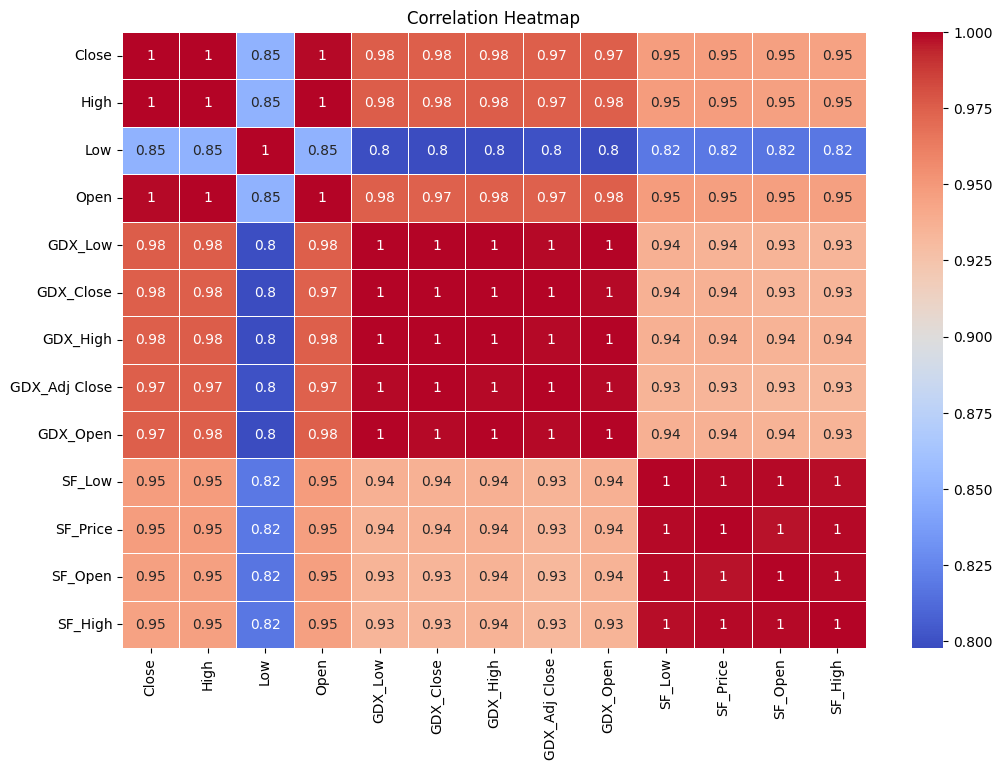

In [ ]:
import matplotlib.pyplot as plt
columns = ["Close", "High", "Low", "Open", "GDX_Low", "GDX_Close",
           "GDX_High", "GDX_Adj Close", "GDX_Open", "SF_Low", "SF_Price",
           "SF_Open", "SF_High"]
df_subset = df[columns]
correlation_matrix = df_subset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
eighty_percent_length = round(len(gold_df) * 0.8)
twenty_percent_length = len(gold_df)-eighty_percent_length


In [ ]:
test_df= gold_df.tail(twenty_percent_length)
gold_df = gold_df.head(eighty_percent_length)


In [ ]:
!pip install hmmlearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.6/164.6 kB 4.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
from hmmlearn import hmm

# Assuming gold_df is a DataFrame with the relevant data already loaded

# Step 3: Prepare your data
hidden_states_columns = ["Low"]
observed_state_column = "Adj Close"

# Extract hidden states and observed states
X = gold_df[hidden_states_columns].values  # Features
# lengths = [len(X)]  # Length of the observation sequences

# Concatenate hidden states into a single string for each observation
concatenated_result = np.apply_along_axis(lambda x: ' & '.join(x.astype(str)), 1, X)

# Step 4: Discretize observed states
observed_states = gold_df[observed_state_column].values


from collections import defaultdict
# Step 2: Transition Probability
transition_counts = defaultdict(lambda: defaultdict(int))

for i in range(len(concatenated_result) - 1):
    current_state = concatenated_result[i]
    next_state = concatenated_result[i + 1]
    transition_counts[current_state][next_state] += 1

# Calculate transition probabilities
transition_probabilities = {}
for current_state, next_states in transition_counts.items():
    total_transitions = sum(next_states.values())
    transition_probabilities[current_state] = {
        next_state: count / total_transitions for next_state, count in next_states.items()
    }
print("Transition Probabilities:", transition_probabilities)


states = sorted(list(set(concatenated_result.tolist())))

# Create a DataFrame to represent the transition probability matrix
transition_matrix = pd.DataFrame(0.0, index=states, columns=states)

# Fill in the DataFrame with transition probabilities
for current_state, next_states in transition_probabilities.items():
    for next_state, prob in next_states.items():
        transition_matrix.loc[current_state, next_state] = prob

# Convert DataFrame to 2D numpy array if needed
transition_matrix_array = transition_matrix.values

print("\nTransition Probability Matrix as 2D array:")
print(transition_matrix_array)


Transition Probabilities: {'3': {'3': 0.9578454332552693, '2': 0.04215456674473068}, '2': {'2': 0.8631178707224335, '1': 0.07224334600760456, '3': 0.06463878326996197}, '1': {'1': 0.8834355828220859, '2': 0.05828220858895705, '0': 0.05828220858895705}, '0': {'0': 0.9467787114845938, '1': 0.05322128851540616}}

Transition Probability Matrix as 2D array:
[[0.94677871 0.05322129 0.         0.        ]
 [0.05828221 0.88343558 0.05828221 0.        ]
 [0.         0.07224335 0.86311787 0.06463878]
 [0.         0.         0.04215457 0.95784543]]


In [ ]:
row_sums = transition_matrix_array.sum(axis=1)

print("Sum of each row in the Transition Probability Matrix:")
for i, row_sum in enumerate(row_sums):
    print(f"Row {i + 1} sum: {row_sum}")

Sum of each row in the Transition Probability Matrix:
Row 1 sum: 1.0
Row 2 sum: 1.0
Row 3 sum: 1.0
Row 4 sum: 1.0


In [ ]:
# Step 1: Initial Probability
# Count the occurrences of the first hidden state in the sequence
initial_counts = defaultdict(int)

# Use only the first state in concatenated_result
initial_counts[concatenated_result[0]] += 1

# Calculate probabilities
total_initial = sum(initial_counts.values())
initial_probabilities = {state: count / total_initial for state, count in initial_counts.items()}
print("Initial Probabilities:", initial_probabilities)


Initial Probabilities: {'3': 1.0}


In [ ]:
unique_values = list(set(concatenated_result.tolist()))

# Step 2: Create a 1D array of zeros with the same size as unique_values
array_of_zeros = np.zeros(len(unique_values))

# Step 3: Retrieve the index of a specific value in unique_values
value_to_find = "3"  # Replace this with the value you're looking for
if value_to_find in unique_values:
    index = unique_values.index(value_to_find)

    # Step 4: Set the value at that index in array_of_zeros to 1
    array_of_zeros[index] = 1

print(sum(array_of_zeros))

1.0


In [ ]:
# Step 3: Emission Probability
emission_counts = defaultdict(lambda: defaultdict(int))

for hidden_state, observed_state in zip(concatenated_result, observed_states):
    emission_counts[hidden_state][observed_state] += 1

# Calculate emission probabilities
emission_probabilities = {}
for hidden_state, observed_sts in emission_counts.items():
    total_emissions = sum(observed_sts.values())
    emission_probabilities[hidden_state] = {
        observed_state: count / total_emissions for observed_state, count in observed_sts.items()
    }
print("Emission Probabilities:", emission_probabilities)


Emission Probabilities: {'3': {3: 0.9812646370023419, 2: 0.01873536299765808}, '2': {2: 0.9621212121212122, 3: 0.030303030303030304, 1: 0.007575757575757576}, '1': {1: 0.9754601226993865, 2: 0.015337423312883436, 0: 0.009202453987730062}, '0': {0: 0.9635854341736695, 1: 0.036414565826330535}}


In [ ]:
# Step 1: Define States
hidden_states = sorted(list(set(concatenated_result.tolist())))
observed = sorted(list(set(observed_states.tolist())))

# Step 2: Create a DataFrame to represent the emission probability matrix
emission_matrix = pd.DataFrame(0.0, index=hidden_states, columns=observed)

# Step 3: Fill in the DataFrame with emission probabilities
for hidden_state, observed_st in emission_probabilities.items():
    for observed_state, prob in observed_st.items():
        emission_matrix.loc[hidden_state, observed_state] = prob

# Convert DataFrame to 2D numpy array if needed
emission_matrix_array = emission_matrix.values



print("\nEmission Probability Matrix as 2D array:")
print(emission_matrix_array)


Emission Probability Matrix as 2D array:
[[0.96358543 0.03641457 0.         0.        ]
 [0.00920245 0.97546012 0.01533742 0.        ]
 [0.         0.00757576 0.96212121 0.03030303]
 [0.         0.         0.01873536 0.98126464]]


In [ ]:
for i, row in enumerate(emission_matrix_array):
    non_zero_values = row[row != 0]  # Get non-zero values in the current row
    if non_zero_values.size > 0:  # Check if there are any non-zero values
        print(f"Row {i} (Hidden State: {emission_matrix.index[i]}): {non_zero_values}")

Row 0 (Hidden State: 0): [0.96358543 0.03641457]
Row 1 (Hidden State: 1): [0.00920245 0.97546012 0.01533742]
Row 2 (Hidden State: 2): [0.00757576 0.96212121 0.03030303]
Row 3 (Hidden State: 3): [0.01873536 0.98126464]


In [ ]:
n_states=len(list(set(concatenated_result.tolist())))
hd_states=["0","1", "2", "3"]
obs_states= ["0","1", "2", "3"]
# transition_matrix_array = np.where(transition_matrix_array == 0, 1e-10, transition_matrix_array)
# emission_matrix_array = np.where(emission_matrix_array == 0, 1e-10, emission_matrix_array)

model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = array_of_zeros
model.transmat_ = transition_matrix_array
model.emissionprob_ = emission_matrix_array
# Define the sequence of observations
# observations_list = test_df['Low'].tolist()

import numpy as np

# Number of unique observed states
# n_observations = len(list(set(test_df['Adj Close'].tolist())))

pred_observed_states= test_df['Adj Close'].tolist()

observations_list = test_df['Adj Close'].tolist()
# values_equal_to_3 = [x for x in observations_list if x == 3]

# print(len(values_equal_to_3))
observations_sequence = np.array(observations_list).reshape(-1, 1)
print(' '.join([str(obs_states[x]) for x in observations_list]))
observations_sequence


# Predict the most likely sequence of hidden states
hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)
print(' '.join([states[x] for x in hidden_states]))


log_probability, hidden_states = model.decode(observations_sequence,
                                              lengths = len(observations_sequence),
                                              algorithm ='viterbi' )

print('Log Probability :',log_probability)
print('Probability :',np.exp(log_probability))



2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
Most likely hidden states: [1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1
 1 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [ ]:
count = 0
for i, value in enumerate(test_df['Low']):
    if i < len(hidden_states):  # Ensure we don't go out of bounds
        if value == hidden_states[i]:
            # Compare with the corresponding hidden state
           count += 1
        print(value)

print('Accuracy :',count/len(observations_sequence))

2
2
1
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
2
1
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
1
0
1
1
1
1
1
0
0
1
1
1
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
Accuracy : 0.9244186046511628


In [ ]:
n_states=len(list(set(concatenated_result.tolist())))
hd_states=["0","1", "2", "3"]
obs_states= ["0","1", "2", "3"]
# transition_matrix_array = np.where(transition_matrix_array == 0, 1e-10, transition_matrix_array)
# emission_matrix_array = np.where(emission_matrix_array == 0, 1e-10, emission_matrix_array)

model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = array_of_zeros
model.transmat_ = transition_matrix_array
model.emissionprob_ = emission_matrix_array
# Define the sequence of observations
# observations_list = test_df['Low'].tolist()

import numpy as np

# Number of unique observed states
# n_observations = len(list(set(test_df['Adj Close'].tolist())))

pred_observed_states= test_df['Adj Close'].tolist()

observations_list = test_df['Adj Close'].tolist()[:10]
# values_equal_to_3 = [x for x in observations_list if x == 3]

# print(len(values_equal_to_3))
test_df
observations_sequence = np.array(observations_list).reshape(-1, 1)
print(' '.join([str(obs_states[x]) for x in observations_list]))
observations_sequence


# Predict the most likely sequence of hidden states
hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)
print(' '.join([states[x] for x in hidden_states]))


log_probability, hidden_states = model.decode(observations_sequence,
                                              lengths = len(observations_sequence),
                                              algorithm ='viterbi' )

print('Log Probability :',log_probability)
print('Probability :',np.exp(log_probability))


2 2 2 2 2 2 2 2 2 2
Most likely hidden states: [1 2 2 2 2 2 2 2 2 2]
1 2 2 2 2 2 2 2 2 2
Log Probability : -8.545083513853783
Probability : 0.00019449900436716044


In [ ]:
count = 0
for i, value in enumerate(test_df['Low']):
    if i < len(hidden_states):  # Ensure we don't go out of bounds
        if value == hidden_states[i]:
            # Compare with the corresponding hidden state
           count += 1
        print(value)

print(count)

2
2
1
2
2
2
2
2
2
1
7


In [ ]:
print("Accuracy:",count/len(observations_sequence))

Accuracy: 0.7
